In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
data_path = "/content/drive/MyDrive/Dicoding/Capstone/Dataset/datasetSpotify.csv"
df = pd.read_csv(data_path)
df

,Unnamed: 0,acousticness,artists,danceability,duration_ms,energy,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence
0,0,0.57800,Adele,0.604,224694,0.366,0gplL1WMoJ6iYaPgMCL0gX,0.000000,5,0.1330,-7.519,1,Easy On Me,100,2021-10-14,0.0282,141.981,0.130
1,1,0.94600,ROSALÍA,0.770,188102,0.302,6dmXZ9B5HdFAyzHeTneYBK,0.000034,0,0.1250,-7.911,0,LA FAMA (with The Weeknd),85,2021-11-11,0.0466,136.010,0.821
2,2,0.08880,Doja Cat,0.824,172626,0.764,6Uj1ctrBOjOas8xZXGqKk4,0.002940,5,0.1170,-4.175,0,Woman,95,2021-06-25,0.0854,107.998,0.881
3,3,0.09100,Adele,0.534,225148,0.725,3Kkjo3cT83cw09VJyrLNwX,0.000000,1,0.0264,-3.906,1,Oh My God,83,2021-11-19,0.0460,88.098,0.550
4,4,0.00207,Travis Scott,0.839,149610,0.506,4R67rQNSbbsR4TdUVOIdez,0.000000,5,0.1300,-6.714,0,ESCAPE PLAN,87,2021-11-05,0.1330,154.120,0.440
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170004,169904,0.17300,"['DripReport', 'Tyga']",0.875,163800,0.443,4KppkflX7I3vJQk7urOJaS,0.000032,1,0.0891,-7.461,1,Skechers (feat. Tyga) - Remix,75,2020-05-15,0.1430,100.012,0.306
170005,169905,0.01670,"['Leon Bridges', 'Terrace Martin']",0.719,167468,0.385,1ehhGlTvjtHo2e4xJFB0SZ,0.031300,8,0.1110,-10.907,1,Sweeter (feat. Terrace Martin),64,2020-06-08,0.0403,128.000,0.270
170006,169906,0.53800,"['Kygo', 'Oh Wonder']",0.514,180700,0.539,52eycxprLhK3lPcRLbQiVk,0.002330,7,0.1080,-9.332,1,How Would I Know,70,2020-05-29,0.1050,123.700,0.153
170007,169907,0.07140,"['Cash Cash', 'Andy Grammer']",0.646,167308,0.761,3wYOGJYD31sLRmBgCvWxa4,0.000000,1,0.2220,-2.557,1,I Found You,70,2020-02-28,0.0385,129.916,0.472


In [ ]:
df_new = pd.DataFrame({
    'artist_name':df['artists'],
    'music_name':df['name'],
    'music_id':df['id'],
    'release_date':df['release_date'],
    'popularity':df['popularity'],
    'acousticness':df['acousticness'],
    'danceability':df['danceability'],
    'duration_ms':df['duration_ms'],
    'energy':df['energy'],
    'instrumentalness':df['instrumentalness'],
    'liveness':df['liveness'],
    'valence':df['valence'],
    'loudness':df['loudness'],
    'speechiness':df['speechiness'],
    'tempo':df['tempo'],
    'key':df['key'],
})
df_new['artist_name'] = df_new['artist_name'].str.title()
df_new['artist_name'] = df_new['artist_name'].replace({'\[|\]|\'|\ ': '', ',': ' '}, regex=True)
df_new.head(5)

,artist_name,music_name,music_id,release_date,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,valence,loudness,speechiness,tempo,key
0,Adele,Easy On Me,0gplL1WMoJ6iYaPgMCL0gX,2021-10-14,100,0.57800,0.604,224694,0.366,0.000000,0.1330,0.130,-7.519,0.0282,141.981,5
1,Rosalía,LA FAMA (with The Weeknd),6dmXZ9B5HdFAyzHeTneYBK,2021-11-11,85,0.94600,0.770,188102,0.302,0.000034,0.1250,0.821,-7.911,0.0466,136.010,0
2,DojaCat,Woman,6Uj1ctrBOjOas8xZXGqKk4,2021-06-25,95,0.08880,0.824,172626,0.764,0.002940,0.1170,0.881,-4.175,0.0854,107.998,5
3,Adele,Oh My God,3Kkjo3cT83cw09VJyrLNwX,2021-11-19,83,0.09100,0.534,225148,0.725,0.000000,0.0264,0.550,-3.906,0.0460,88.098,1
4,TravisScott,ESCAPE PLAN,4R67rQNSbbsR4TdUVOIdez,2021-11-05,87,0.00207,0.839,149610,0.506,0.000000,0.1300,0.440,-6.714,0.1330,154.120,5


In [ ]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170009 entries, 0 to 170008
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   artist_name       170009 non-null  object 
 1   music_name        170009 non-null  object 
 2   music_id          170009 non-null  object 
 3   release_date      170009 non-null  object 
 4   popularity        170009 non-null  int64  
 5   acousticness      170009 non-null  float64
 6   danceability      170009 non-null  float64
 7   duration_ms       170009 non-null  int64  
 8   energy            170009 non-null  float64
 9   instrumentalness  170009 non-null  float64
 10  liveness          170009 non-null  float64
 11  valence           170009 non-null  float64
 12  loudness          170009 non-null  float64
 13  speechiness       170009 non-null  float64
 14  tempo             170009 non-null  float64
 15  key               170009 non-null  int64  
dtypes: float64(9), int64

In [ ]:
df_new.isnull().sum()

artist_name         0
music_name          0
music_id            0
release_date        0
popularity          0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
liveness            0
valence             0
loudness            0
speechiness         0
tempo               0
key                 0
dtype: int64

In [ ]:
df_new.describe(include='all')

,artist_name,music_name,music_id,release_date,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,valence,loudness,speechiness,tempo,key
count,170009,170009,170009,170009,170009.000000,170009.000000,170009.000000,1.700090e+05,170009.000000,170009.000000,170009.000000,170009.000000,170009.000000,170009.000000,170009.000000,170009.000000
unique,33383,133010,169998,10938,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,ЭрнестХемингуэй,Summertime,7eJMfftS33KTjuF7lTsMCx,1945,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1215,62,2,1449,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,31.582851,0.493064,0.538237,2.313854e+05,0.488679,0.161843,0.206671,0.532087,-11.367115,0.094059,116.948722,5.200307
std,NaN,NaN,NaN,NaN,21.609219,0.376619,0.175360,1.212942e+05,0.267364,0.309263,0.176776,0.262380,5.666805,0.149908,30.724353,3.515373
min,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,5.108000e+03,0.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000
25%,NaN,NaN,NaN,NaN,12.000000,0.094300,0.417000,1.710300e+05,0.263000,0.000000,0.098400,0.322000,-14.467000,0.034900,93.519000,2.000000
50%,NaN,NaN,NaN,NaN,34.000000,0.492000,0.548000,2.085730e+05,0.481000,0.000203,0.135000,0.544000,-10.471000,0.045100,114.780000,5.000000
75%,NaN,NaN,NaN,NaN,48.000000,0.888000,0.668000,2.629330e+05,0.710000,0.086500,0.263000,0.749000,-7.114000,0.075400,135.712000,8.000000


In [ ]:
duplicateRowsDF = df_new[df_new.duplicated(subset=['music_id'], keep=False)]
duplicateRowsDF

,artist_name,music_name,music_id,release_date,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,valence,loudness,speechiness,tempo,key
15,HarryStyles,Watermelon Sugar,1e9oZCCiX42nJl0AcqriVo,2019-11-17,72,0.1220,0.548,174000,0.816,0.000000,0.3350,0.557,-4.209,0.0465,95.390,0
24,HarryStyles,Adore You,3jjujdWJ72nww5eGnfs2E7,2019-12-13,84,0.0237,0.676,207133,0.771,0.000007,0.1020,0.569,-3.675,0.0483,99.048,8
33,TateMcrae,that way,7l97ElWmIdVHWUaOeeU5ZC,2020-01-24,81,0.7280,0.453,175026,0.383,0.000000,0.3870,0.333,-11.015,0.1630,105.029,0
36,Giveon,Heartbreak Anniversary,3FAJ6O0NOHQV8Mc5Ri6ENp,2020-03-27,85,0.5240,0.449,198370,0.465,0.000001,0.3030,0.543,-8.964,0.0791,89.087,0
44,Brockhampton,SUGAR,6U0FIYXCQ3TGrk4tFpLrEA,2019-08-23,76,0.4490,0.453,204533,0.538,0.000000,0.1900,0.516,-8.212,0.0638,122.973,1
48,Future,Life Is Good (feat. Drake),5yY9lUy8nbvjM1Uyo1Uqoc,2020-01-10,80,0.0706,0.676,237735,0.609,0.000000,0.1520,0.508,-5.831,0.4810,142.037,2
49,Partynextdoor,BELIEVE IT,4HDCLYli2SUdkq9OjmvhSD,2020-03-27,73,0.0902,0.430,183219,0.700,0.000000,0.2160,0.731,-5.350,0.2640,158.373,6
50,Khalid,Talk (feat. Disclosure),6TqXcAFInzjp0bODyvrWEq,2019-04-05,73,0.0516,0.900,197573,0.400,0.000000,0.0599,0.346,-8.575,0.1270,135.984,0
55,TheNeighbourhood,Sweater Weather,2QjOHCTQ1Jl3zawyYOpxh6,2013-04-19,89,0.0495,0.612,240400,0.807,0.017700,0.1010,0.398,-2.810,0.0336,124.053,10
68,TheWeeknd,Save Your Tears,5QO79kh1waicV47BqGRL3g,2020-03-20,87,0.0212,0.680,215626,0.826,0.000012,0.5430,0.644,-5.487,0.0309,118.051,0


In [ ]:
df_new = df_new.drop_duplicates(subset=['music_id'], keep='first', inplace=False)
df_new

,artist_name,music_name,music_id,release_date,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,valence,loudness,speechiness,tempo,key
0,Adele,Easy On Me,0gplL1WMoJ6iYaPgMCL0gX,2021-10-14,100,0.57800,0.604,224694,0.366,0.000000,0.1330,0.130,-7.519,0.0282,141.981,5
1,Rosalía,LA FAMA (with The Weeknd),6dmXZ9B5HdFAyzHeTneYBK,2021-11-11,85,0.94600,0.770,188102,0.302,0.000034,0.1250,0.821,-7.911,0.0466,136.010,0
2,DojaCat,Woman,6Uj1ctrBOjOas8xZXGqKk4,2021-06-25,95,0.08880,0.824,172626,0.764,0.002940,0.1170,0.881,-4.175,0.0854,107.998,5
3,Adele,Oh My God,3Kkjo3cT83cw09VJyrLNwX,2021-11-19,83,0.09100,0.534,225148,0.725,0.000000,0.0264,0.550,-3.906,0.0460,88.098,1
4,TravisScott,ESCAPE PLAN,4R67rQNSbbsR4TdUVOIdez,2021-11-05,87,0.00207,0.839,149610,0.506,0.000000,0.1300,0.440,-6.714,0.1330,154.120,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170004,Dripreport Tyga,Skechers (feat. Tyga) - Remix,4KppkflX7I3vJQk7urOJaS,2020-05-15,75,0.17300,0.875,163800,0.443,0.000032,0.0891,0.306,-7.461,0.1430,100.012,1
170005,LeonBridges TerraceMartin,Sweeter (feat. Terrace Martin),1ehhGlTvjtHo2e4xJFB0SZ,2020-06-08,64,0.01670,0.719,167468,0.385,0.031300,0.1110,0.270,-10.907,0.0403,128.000,8
170006,Kygo OhWonder,How Would I Know,52eycxprLhK3lPcRLbQiVk,2020-05-29,70,0.53800,0.514,180700,0.539,0.002330,0.1080,0.153,-9.332,0.1050,123.700,7
170007,CashCash AndyGrammer,I Found You,3wYOGJYD31sLRmBgCvWxa4,2020-02-28,70,0.07140,0.646,167308,0.761,0.000000,0.2220,0.472,-2.557,0.0385,129.916,1


In [ ]:
continuous_features = df.select_dtypes(include='float').columns.to_list()
continuous_features

['acousticness',
 'danceability',
 'energy',
 'instrumentalness',
 'liveness',
 'loudness',
 'speechiness',
 'tempo',
 'valence']

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


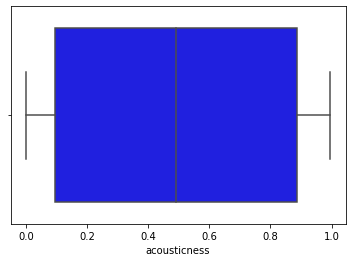

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


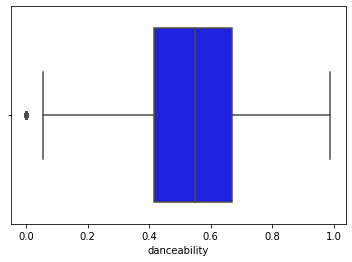

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


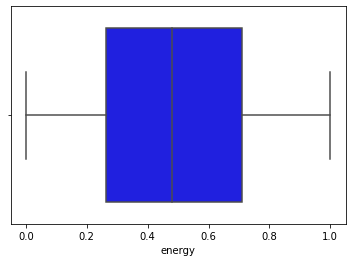

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


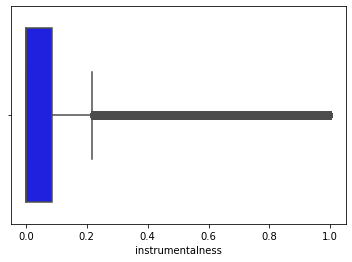

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


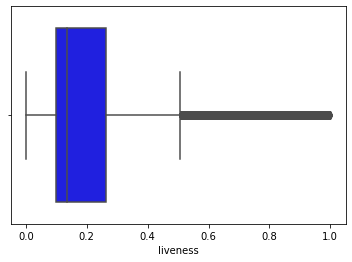

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


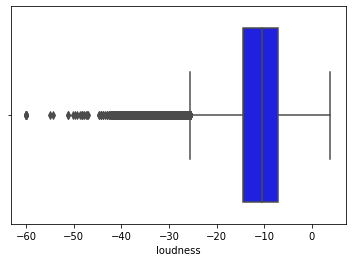

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


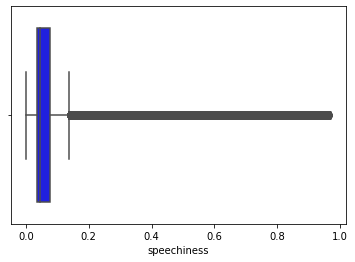

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


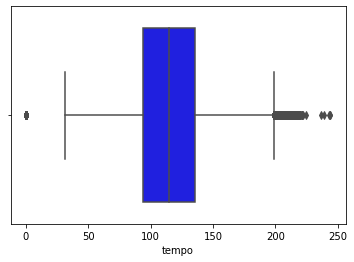

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


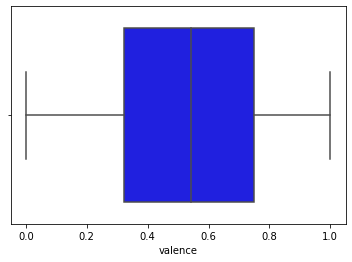

In [ ]:
import seaborn as sns

for features in df[continuous_features]:
    sns.boxplot(df_new[features], color='blue')
    plt.show()

In [ ]:
Q1 = df_new.quantile(0.25)
Q3 = df_new.quantile(0.75)
IQR = Q3-Q1
df_new = df_new[~((df_new<(Q1-1.5*IQR))|(df_new>(Q3+1.5*IQR))).any(axis=1)]

In [ ]:
df_new.shape

(100866, 16)

In [ ]:
mean = df_new['popularity'].mean()
mean

35.64190113616085

In [ ]:
df_new.drop(df_new[df_new.popularity < 50].index, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
df_new

,artist_name,music_name,music_id,release_date,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,valence,loudness,speechiness,tempo,key
0,Adele,Easy On Me,0gplL1WMoJ6iYaPgMCL0gX,2021-10-14,100,0.57800,0.604,224694,0.366,0.000000,0.1330,0.130,-7.519,0.0282,141.981,5
1,Rosalía,LA FAMA (with The Weeknd),6dmXZ9B5HdFAyzHeTneYBK,2021-11-11,85,0.94600,0.770,188102,0.302,0.000034,0.1250,0.821,-7.911,0.0466,136.010,0
2,DojaCat,Woman,6Uj1ctrBOjOas8xZXGqKk4,2021-06-25,95,0.08880,0.824,172626,0.764,0.002940,0.1170,0.881,-4.175,0.0854,107.998,5
3,Adele,Oh My God,3Kkjo3cT83cw09VJyrLNwX,2021-11-19,83,0.09100,0.534,225148,0.725,0.000000,0.0264,0.550,-3.906,0.0460,88.098,1
4,TravisScott,ESCAPE PLAN,4R67rQNSbbsR4TdUVOIdez,2021-11-05,87,0.00207,0.839,149610,0.506,0.000000,0.1300,0.440,-6.714,0.1330,154.120,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170003,Legado7 JuniorH,Ojos De Maniaco,52Cpyvd2dKb6XRn313nH87,2020-02-28,68,0.21000,0.795,218501,0.585,0.000001,0.1120,0.934,-4.451,0.0374,97.479,8
170005,LeonBridges TerraceMartin,Sweeter (feat. Terrace Martin),1ehhGlTvjtHo2e4xJFB0SZ,2020-06-08,64,0.01670,0.719,167468,0.385,0.031300,0.1110,0.270,-10.907,0.0403,128.000,8
170006,Kygo OhWonder,How Would I Know,52eycxprLhK3lPcRLbQiVk,2020-05-29,70,0.53800,0.514,180700,0.539,0.002330,0.1080,0.153,-9.332,0.1050,123.700,7
170007,CashCash AndyGrammer,I Found You,3wYOGJYD31sLRmBgCvWxa4,2020-02-28,70,0.07140,0.646,167308,0.761,0.000000,0.2220,0.472,-2.557,0.0385,129.916,1


In [ ]:
df_new.to_csv("/content/drive/MyDrive/Dicoding/Capstone/datacleaning.csv", index=False)